In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import random

In [2]:
file_train = []
with open('lab_1_train.csv') as File:
    reader = csv.DictReader(File)
    for row in reader:
        file_train.append(row)
    #print(file)

In [3]:
array = dict()

for row in file_train:
    i,x,y = row.values()
    array[float(x)] = float (y)
    #print(i+" "+x+" "+y)

x_list = list(array.keys())
y_list = list(array.values())

m = len(x_list)

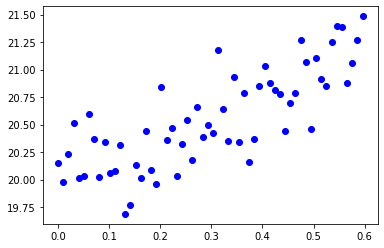

In [4]:
plt.plot(x_list, y_list, "bo")

In [5]:
def predict (teta, x):
    return teta[0] + teta[1] * x

In [6]:
teta = [random.uniform(0, 10), random.uniform(0, 10)]
alpha = 1
tolerance = 0.000001
tetaLast = [0,0]

In [7]:
def checkTolerance (tetaLast, teta, tolerance):
    return ((abs(tetaLast[0]-teta[0])>tolerance) or (abs(tetaLast[1]-teta[1])>tolerance))

def sumTeta0 (teta, x, y, m):
    sumTeta = 0;
    for i in range(m):
        sumTeta += predict(teta, x[i]) - y[i]
    return sumTeta

def sumTeta1 (teta, x, y, m):
    sumTeta = 0;
    for i in range(0,m):
        sumTeta += (predict(teta, x[i]) - y[i]) * x[i]
    return sumTeta

def lossFunc (teta, x, y, m):
    sumLoss = 0;
    for i in range(0,m):
        sumLoss += (y[i] - predict(teta, x[i])) ** 2
    return sumLoss / (2 * m)

In [8]:
print("Start teta")
print("teta 0 = ",teta[0],"; teta 1 = ",teta[1],"\n")

print("Gradient")
while(checkTolerance(tetaLast, teta, tolerance)):
    tetaLast = teta.copy()
    teta[0] = teta[0] - (alpha/m) * sumTeta0(teta, x_list, y_list, m);
    teta[1] = teta[1] - (alpha/m) * sumTeta1(teta, x_list, y_list, m);
    loss = lossFunc(teta, x_list, y_list, m)
    print("teta 0 = ",teta[0],"; teta 1 = ",teta[1],"; loss = ", loss)
    
print("\nResult\nteta 0 = ",teta[0],"; teta 1 = ",teta[1],"; loss = ", loss)

Start teta
teta 0 =  7.736054385946752 ; teta 1 =  9.599304110910442 

Gradient
teta 0 =  17.68916449132271 ; teta 1 =  9.366111507740241 ; loss =  0.8739093055361563
teta 0 =  17.75865117610575 ; teta 1 =  9.140054742569646 ; loss =  0.8234440243291274
teta 0 =  17.826011525323253 ; teta 1 =  8.920915454338894 ; loss =  0.7760200252239693
teta 0 =  17.89131060615969 ; teta 1 =  8.708481963971817 ; loss =  0.7314540258411545
teta 0 =  17.954611494703414 ; teta 1 =  8.502549069903 ; loss =  0.6895737892844485
teta 0 =  18.015975336875435 ; teta 1 =  8.30291784986195 ; loss =  0.6502174584866243
teta 0 =  18.075461407493727 ; teta 1 =  8.10939546872278 ; loss =  0.61323293067073
teta 0 =  18.133127167530144 ; teta 1 =  7.921794992233815 ; loss =  0.5784772695093424
teta 0 =  18.189028319615243 ; teta 1 =  7.739935206447191 ; loss =  0.5458161527099522
teta 0 =  18.24321886184459 ; teta 1 =  7.563640442674018 ; loss =  0.5151233528915298
teta 0 =  18.295751139938616 ; teta 1 =  7.39274040

teta 0 =  19.959657044264294 ; teta 1 =  1.979657491917359 ; loss =  0.03651754559089571
teta 0 =  19.95966525152772 ; teta 1 =  1.9796307917311746 ; loss =  0.036517544886873594
teta 0 =  19.959673207643807 ; teta 1 =  1.9796049085872143 ; loss =  0.036517544225279426
teta 0 =  19.959680920297814 ; teta 1 =  1.9795798174834807 ; loss =  0.03651754360355602
teta 0 =  19.959688396939836 ; teta 1 =  1.9795554941830522 ; loss =  0.03651754301930063
teta 0 =  19.959695644791985 ; teta 1 =  1.979531915190672 ; loss =  0.036517542470255404
teta 0 =  19.95970267085537 ; teta 1 =  1.9795090577300538 ; loss =  0.036517541954298245
teta 0 =  19.959709481916867 ; teta 1 =  1.9794868997218793 ; loss =  0.03651754146943511
teta 0 =  19.959716084555666 ; teta 1 =  1.9794654197624706 ; loss =  0.03651754101379225
teta 0 =  19.959722485149634 ; teta 1 =  1.979444597103115 ; loss =  0.03651754058560861
teta 0 =  19.95972868988146 ; teta 1 =  1.9794244116300252 ; loss =  0.036517540183229384
teta 0 =  1

In [9]:
def optimalTeta(x_list,y_list, m,tetaOptimal):
    sum_x, sum_x2, sum_y, sum_xy = 0,0,0,0
    for i in range(m):
        sum_x += x_list[i]
        sum_x2 += x_list[i] ** 2
        sum_y += y_list[i]
        sum_xy += x_list[i] * y_list[i]
        
    
    tetaOptimal[0] = (sum_xy - 1 / m * sum_x * sum_y) / (sum_x2 - 1 / m * (sum_x ** 2))
    tetaOptimal[1] = sum_y / m - tetaOptimal[0] * (sum_x / m)
    print("\nOptimal\nteta 0 = ",tetaOptimal[0],"; teta 1 = ",tetaOptimal[1])
  
tetaOptimal = [0,0]
optimalTeta(x_list,y_list, m, tetaOptimal)


Optimal
teta 0 =  1.978784954463182 ; teta 1 =  19.95992525006205


In [10]:
file_test = []
with open('lab_1_test.csv') as File:
    reader = csv.DictReader(File)
    for row in reader:
        file_test.append(row)
    #print(file)

In [11]:
arrayt = dict()

for row in file_test:
    i,x,y = row.values()
    arrayt[float(x)] = float (y)
    #print(i+" "+x+" "+y)

xt_list = list(arrayt.keys())
yt_list = list(arrayt.values())

mt = len(xt_list)

lossTest = lossFunc(teta, xt_list, yt_list, mt)
print("Loss in test case = ",lossTest)

Loss in test case =  0.03779284323688017


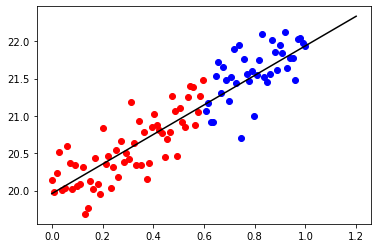

In [12]:
x0 = 0
y0 = teta[0] + teta[1] * x0
x1 = 1.2
y1 = teta[0] + teta[1] * x1

plt.plot (x_list, y_list, 'ro')
plt.plot (xt_list, yt_list,'bo')
plt.plot ([x0,x1],[y0,y1], 'black')

#optimal

#x0 = 0
#y0 = tetaOptimal[1] + tetaOptimal[0] * x0
#x1 = 1.2
#y1 = tetaOptimal[1] + tetaOptimal[0] * x1
#plt.plot ([x0,x1],[y0,y1], 'green')